2
2
3
2
3
4
2
3
4


c:\Users\Latitude 5289 2-in-1\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 41 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\Latitude 5289 2-in-1\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This cod

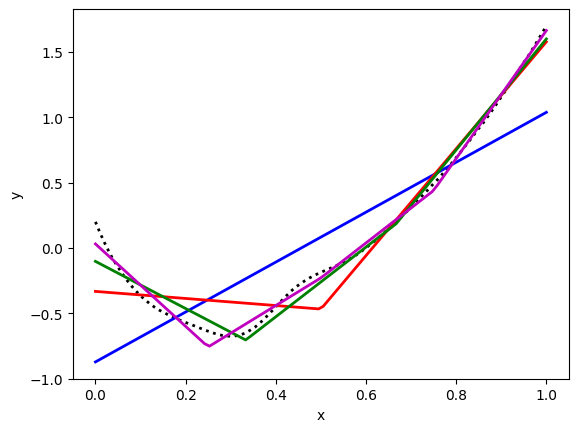

In [77]:
import numpy as np
import cvxpy as cv
import matplotlib.pyplot as plt

# Plotting x and y
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, 'k:', linewidth=2)

# Single line
X = np.column_stack((x, np.ones(100)))
p = np.linalg.lstsq(X, y, rcond=None)[0]
alpha = p[0]
beta = p[1]
ax.plot(x, alpha*x+beta, 'b', linewidth=2)
mse = np.linalg.norm(alpha*x+beta-y)**2

for K in range(2, 5):
    # Generate Lagrange basis
    a = np.linspace(0, 1, K+1)
    F = np.maximum((a[1]-x)/(a[1]-a[0]), 0)
    #f=np.maximum(0, (a[1]-x)/(a[1]-a[0]))
    #F = np.column_stack((F, f))
    print(K)
    for k in range(2, K+1):
        a_1 = a[k-2]
        a_2 = a[k-1]
        a_3 = a[k]
        f = np.maximum(0, np.minimum((x-a_1)/(a_2-a_1), (a_3-x)/(a_3-a_2)))
        print(k)
        F = np.column_stack((F, f))

    f = np.maximum(0, (x-a[K-1])/(a[K]-a[K-1]))
    F = np.column_stack((F, f))

    # Solve problem
    z = cv.Variable(K+1)
    z=cv.reshape(z,(K+1,1))
    y=y.reshape((y.size,1))
    objective = cv.Minimize(cv.norm(F*z - y))
    constraints = [((z[2:,0] - z[1:-1,0])/(a[2:] - a[1:-1])) >= ((z[1:-1,0] - z[:-2,0])/(a[1:-1] - a[:-2]))]
    prob = cv.Problem(objective, constraints)
    prob.solve()

    # Calculate alpha and beta
    alpha = (z[1:,0] - z[:-1,0])/(a[1:] - a[:-1])
    beta = z[1:] - alpha * a[1:]
    # Plot solution
    y2 = np.dot(F, z.value)
    mse = np.linalg.norm(y2-y)**2
    if K==2:
        ax.plot(x, y2, 'r', linewidth=2)
    elif K==3:
        ax.plot(x, y2, 'g', linewidth=2)
    else:
        ax.plot(x, y2, 'm', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [76]:
for i in range(2,3):
    print(i)

2
